# Fisher discriminant analysis. show in 
https://www.bilibili.com/video/av33101528/?p=4

(100, 2)


<IPython.core.display.Javascript object>


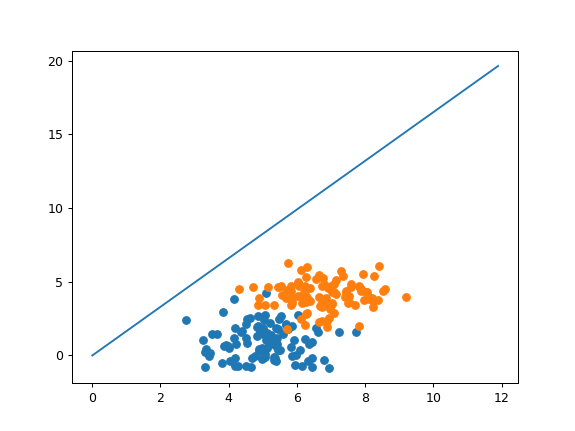

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
mean_1 = (5, 1)
cov_1 = [[1, 0], [0, 1]]
data_1=np.random.multivariate_normal(mean_1,cov_1,(100))
#print(data_1.shape)
plt.scatter(data_1[:,0],data_1[:,1])

mean_2= (7, 4)
cov_2 = [[1, 0], [0, 1]]
data_2=np.random.multivariate_normal(mean_2,cov_2,(100))
plt.scatter(data_2[:,0],data_2[:,1])
plt.show()
ones_1=np.ones(np.shape(data_1)[0])
data_11=np.concatenate((data_1,ones_1[:,np.newaxis]),1)
ones_2=1*np.ones(np.shape(data_2)[0])
data_22=np.concatenate((data_2,ones_2[:,np.newaxis]),1)
tag=np.concatenate((1*ones_1,-1*ones_2),0)
#print(data_1.shape)
data_total=np.concatenate((data_11,data_22),0)
data_total_nobias=np.concatenate((data_1,data_2),0)
#print(data_total)
#print(tag)

## the gradient, $w\propto S_w^{-1}*(x_{c1}-x_{c2})$

[[ 186.56236348    2.64709724]
 [   2.64709724  206.39979123]]
[-0.0090763  -0.01497523]
[ 5.05223983  0.96886463]


<IPython.core.display.Javascript object>


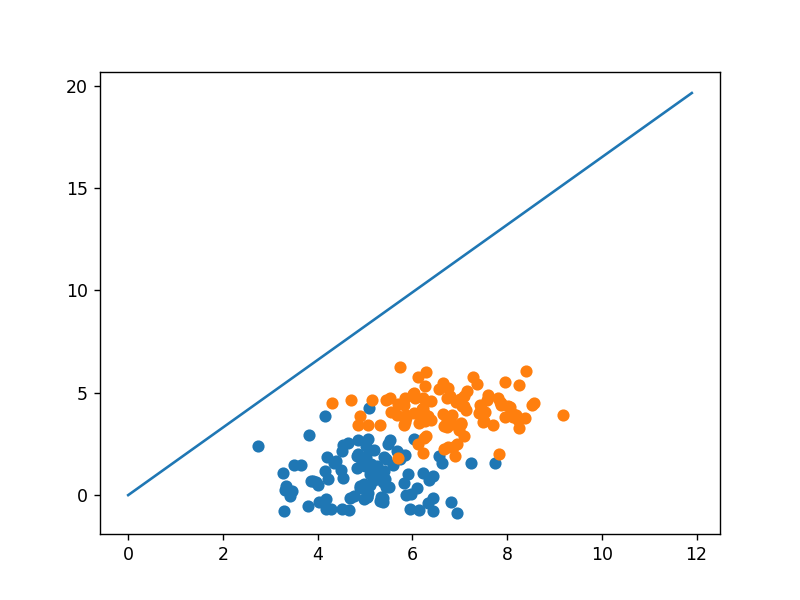

<IPython.core.display.Javascript object>


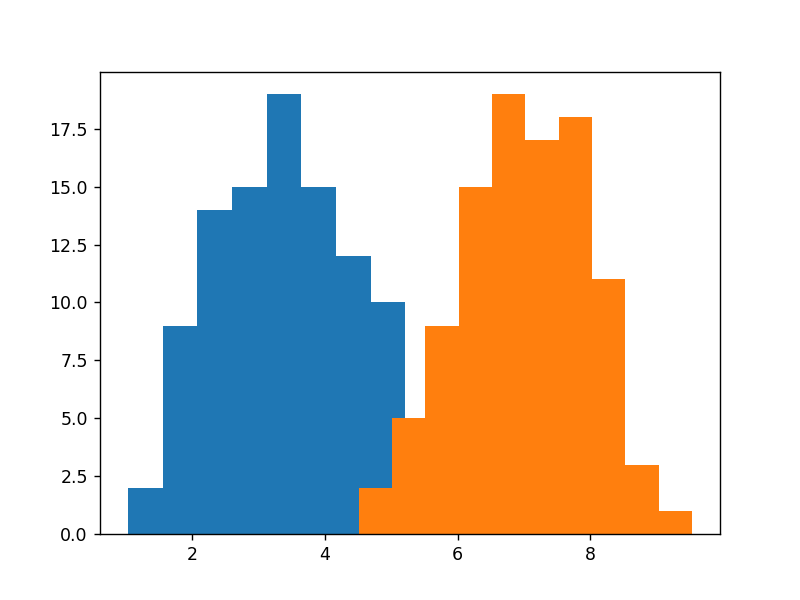

In [23]:
x_c1=np.mean(data_1,0)
x_c2=np.mean(data_2,0)
S_w=(data_1-x_c1).T@(data_1-x_c1)+(data_2-x_c2).T@(data_2-x_c2)
print(S_w)
w=np.array([0,1])
w=np.linalg.inv(S_w)@(x_c1-x_c2).T
print(w)
print(x_c1)
w=-w/np.linalg.norm(w, ord=2)
line_x=np.arange(0,12,0.1)
line_y=w[1]/w[0]*line_x
plt.figure()
plt.scatter(data_1[:,0],data_1[:,1])
plt.scatter(data_2[:,0],data_2[:,1])

plt.plot(line_x,line_y)
plt.show()
plt.figure()
data1_proj=data_1@w
data2_proj=data_2@w

plt.hist(data1_proj,10)
plt.hist(data2_proj,10)
plt.show()
